In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from config import getClient
from datetime import timedelta

In [2]:
dataloc = getClient("OutFront")

In [3]:
df = pd.read_csv(dataloc+"predictions.csv")

# Convert their date format to a standard date
df["date"] = pd.to_datetime(df["date"])

In [6]:
# Get a random panel to view
panels = df["panel"].unique()
panel = np.random.choice(panels)

df2 = df.loc[df["panel"]==panel]

       2018-05-24  -  2018-05-30


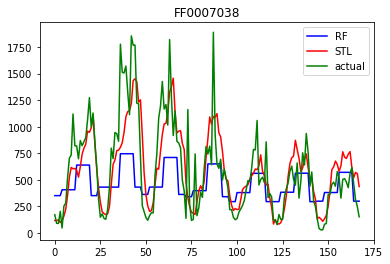

       2018-05-31  -  2018-06-06


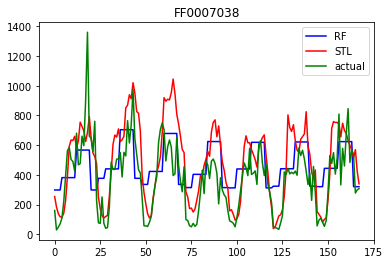

       2018-06-07  -  2018-06-13


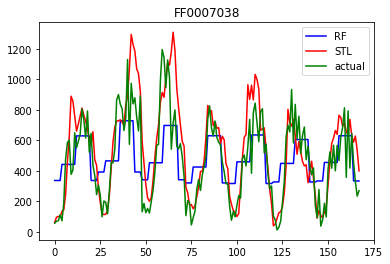

       2018-06-14  -  2018-06-20


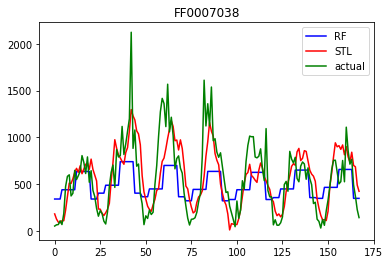

       2018-06-21  -  2018-06-27


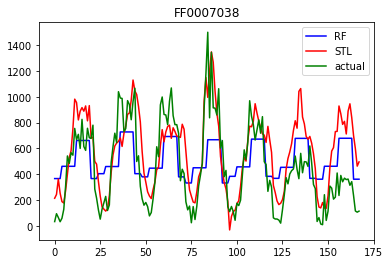

       2018-06-28  -  2018-07-04


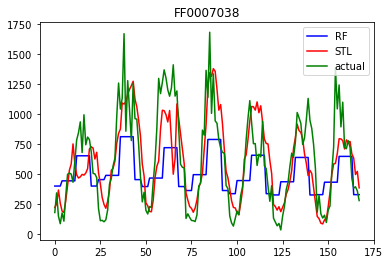

       2018-07-05  -  2018-07-10


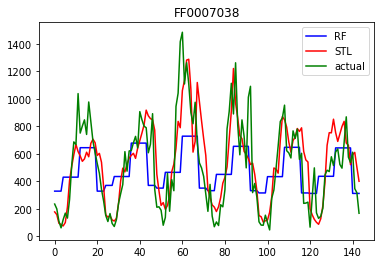

In [7]:
start = df2["date"].min()

while start < df2["date"].max():
    end = start+timedelta(weeks=1)
    tmp = df2.loc[~(df2["date"] < start) & (df2["date"] < end)]
    fromdt = tmp["date"].min().date()
    todt   = tmp["date"].max().date()
    print("       {}  -  {}".format(fromdt, todt))
    X = [x for x in range(tmp.shape[0])]
    plt.plot(X, tmp["RF"],     color="b")
    plt.plot(X, tmp["STL"],    color="r")
    plt.plot(X, tmp["actual"], color="g")
    plt.legend(loc=1)
    plt.title(panel)
    plt.show()
    start = end